Building The Model

In [42]:
#Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Import machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [41]:
#Reading the dataset
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [6]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [7]:
df["age"].value_counts().min()

36

In [8]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [9]:
count_no_info = df[df['smoking_history'] == 'No Info'].shape[0]
count_no_info

35816

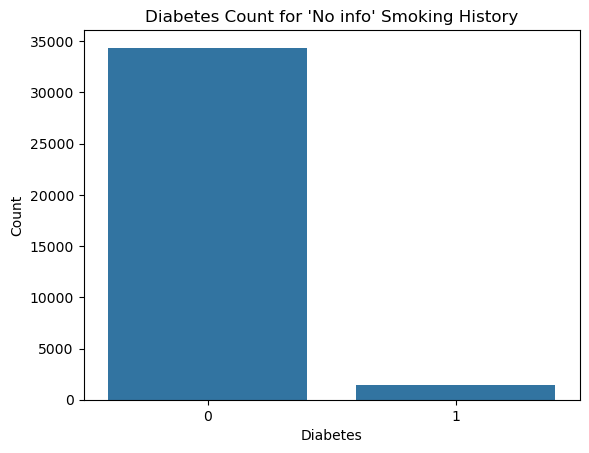

In [10]:
sns.countplot(data=df[df['smoking_history'] == 'No Info'], x='diabetes')

plt.title("Diabetes Count for 'No info' Smoking History")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

In [11]:
df_no_info = df[df['smoking_history'] == 'No Info']
diabetes_counts_no_info = df_no_info['diabetes'].value_counts()

print("Diabetes counts for 'No info' smoking history:")
print(diabetes_counts_no_info)

Diabetes counts for 'No info' smoking history:
diabetes
0    34362
1     1454
Name: count, dtype: int64


In [12]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [13]:
# Remove rows where 'smoking_history' is 'No info'
df = df[df['smoking_history'] != 'No Info']

# Verify that rows have been removed
print(df['smoking_history'].value_counts())

smoking_history
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [15]:
df["gender"].value_counts()

gender
Female    38852
Male      25320
Other        12
Name: count, dtype: int64

In [16]:
df["hypertension"].value_counts()

hypertension
0    57901
1     6283
Name: count, dtype: int64

In [17]:
df["heart_disease"].value_counts()

heart_disease
0    61165
1     3019
Name: count, dtype: int64

In [18]:
# Detecting outliers in 'bmi' using IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

In [19]:
# Filtering out the outliers
df_no_outliers = df[~((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR)))]

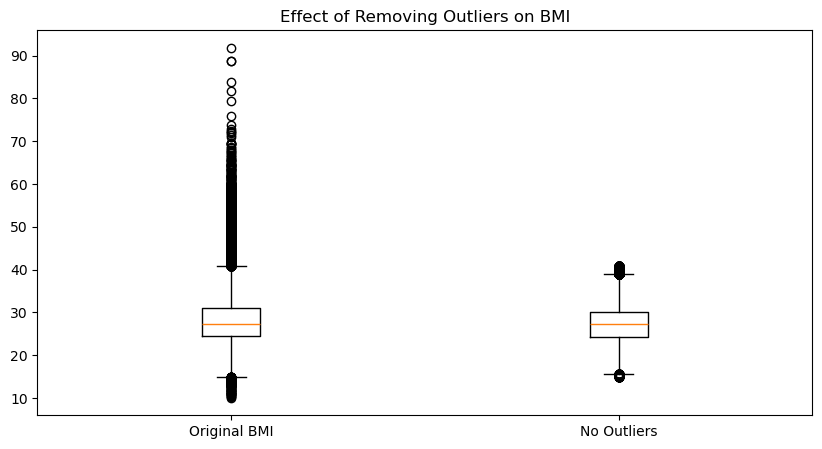

In [20]:
plt.figure(figsize=(10, 5))
plt.boxplot([df['bmi'], df_no_outliers['bmi']], labels=['Original BMI', 'No Outliers'])
plt.title('Effect of Removing Outliers on BMI')
plt.show()

In [21]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the 'bmi' column
df_no_outliers['bmi_normalized'] = scaler.fit_transform(df_no_outliers[['bmi']])

# Apply the scaler to the 'HbA1c_level' column
df_no_outliers['HbA1c_normalized'] = scaler.fit_transform(df_no_outliers[['HbA1c_level']])

# Fit the scaler on both 'bmi' and 'HbA1c_level' columns together
scaler.fit(df[['bmi', 'HbA1c_level']])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13844\548467545.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['bmi_normalized'] = scaler.fit_transform(df_no_outliers[['bmi']])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13844\548467545.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['HbA1c_normalized'] = scaler.fit_transform(df_no_outliers[['HbA1c_level']])


MinMaxScaler()

In [23]:
df.shape

(64184, 9)

In [24]:
df_no_outliers.shape

(60765, 11)

In [25]:
df_no_outliers.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_normalized,HbA1c_normalized
0,Female,80.0,0,1,never,25.19,6.6,140,0,0.397229,0.563636
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.479215,0.400000
3,Female,36.0,0,0,current,23.45,5.0,155,0,0.330254,0.272727
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.202848,0.236364
5,Female,20.0,0,0,never,27.32,6.6,85,0,0.479215,0.563636


In [26]:
# Define bins for age groups and assign labels
bins = [0, 18, 35, 60, 100]
labels = ['Child', 'Youth', 'Adult', 'Senior']

In [27]:
# # Discretize 'age' into categories
df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=bins, labels=labels)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13844\246668323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=bins, labels=labels)


In [28]:
# Display the first few rows to verify the changes
print(df_no_outliers[['age', 'age_group']].head())

    age age_group
0  80.0    Senior
2  28.0     Youth
3  36.0     Adult
4  76.0    Senior
5  20.0     Youth


In [29]:
# Define BMI categories according to the WHO BMI classification
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

In [30]:
# Create a BMI category based on the ranges
df_no_outliers['bmi_category'] = pd.cut(df_no_outliers['bmi'], bins=bmi_bins, labels=bmi_labels)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13844\185744636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['bmi_category'] = pd.cut(df_no_outliers['bmi'], bins=bmi_bins, labels=bmi_labels)


In [31]:
# Display the first few rows to verify the changes
print(df_no_outliers[['bmi', 'bmi_category']].head())

     bmi bmi_category
0  25.19   Overweight
2  27.32   Overweight
3  23.45       Normal
4  20.14       Normal
5  27.32   Overweight


In [32]:
df_no_outliers.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_normalized,HbA1c_normalized,age_group,bmi_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,0.397229,0.563636,Senior,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.479215,0.400000,Youth,Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,0.330254,0.272727,Adult,Normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.202848,0.236364,Senior,Normal
5,Female,20.0,0,0,never,27.32,6.6,85,0,0.479215,0.563636,Youth,Overweight


In [33]:
# Encode categorical variables
label_encoder = LabelEncoder()

df_no_outliers['gender'] = label_encoder.fit_transform(df_no_outliers['gender'])  # Female: 0, Male: 1
df_no_outliers['smoking_history'] = label_encoder.fit_transform(df_no_outliers['smoking_history'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13844\2434974166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['gender'] = label_encoder.fit_transform(df_no_outliers['gender'])  # Female: 0, Male: 1
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13844\2434974166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['smoking_history'] = label_encoder.fit_transform(df_no_outliers['smoking_history'])


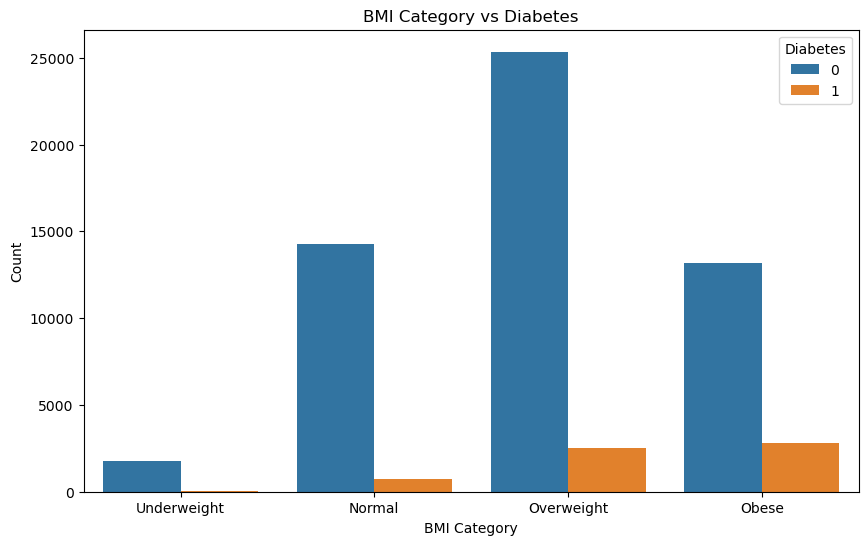

In [34]:
# Visualize the relationship between bmi_category and diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x=df_no_outliers['bmi_category'], hue=df_no_outliers['diabetes'])
plt.title('BMI Category vs Diabetes')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.show()

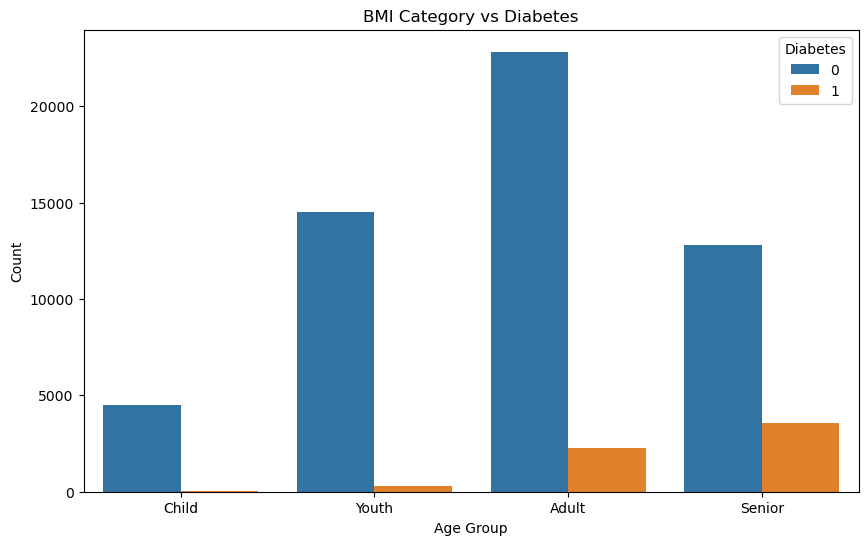

In [35]:
# Visualize the relationship between Age Group and diabetes
plt.figure(figsize=(10, 6))
sns.countplot(x=df_no_outliers['age_group'], hue=df_no_outliers['diabetes'])
plt.title('BMI Category vs Diabetes')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.show()

In [36]:
df_no_outliers.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_normalized,HbA1c_normalized,age_group,bmi_category
0,0,80.0,0,1,3,25.19,6.6,140,0,0.397229,0.563636,Senior,Overweight
2,1,28.0,0,0,3,27.32,5.7,158,0,0.479215,0.400000,Youth,Overweight
3,0,36.0,0,0,0,23.45,5.0,155,0,0.330254,0.272727,Adult,Normal
4,1,76.0,1,1,0,20.14,4.8,155,0,0.202848,0.236364,Senior,Normal
5,0,20.0,0,0,3,27.32,6.6,85,0,0.479215,0.563636,Youth,Overweight


In [37]:
# Features and target
X = df_no_outliers.drop(columns=['diabetes','bmi','HbA1c_level','age_group','bmi_category']) 
y = df_no_outliers['diabetes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X

,gender,age,hypertension,heart_disease,smoking_history,blood_glucose_level,bmi_normalized,HbA1c_normalized
0,0,80.0,0,1,3,140,0.397229,0.563636
2,1,28.0,0,0,3,158,0.479215,0.400000
3,0,36.0,0,0,0,155,0.330254,0.272727
4,1,76.0,1,1,0,155,0.202848,0.236364
5,0,20.0,0,0,3,85,0.479215,0.563636
...,...,...,...,...,...,...,...,...
99992,0,26.0,0,0,3,160,0.749423,0.545455
99993,0,40.0,0,0,3,155,0.993841,0.000000
99997,1,66.0,0,0,2,155,0.498845,0.400000
99998,0,24.0,0,0,3,100,0.790993,0.090909


In [39]:
y

0        0
2        0
3        0
4        0
5        0
        ..
99992    0
99993    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 60765, dtype: int64

In [43]:
# Initialize the classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize variables to track the best model
best_accuracy = 0
best_model_name = ""
best_model = None

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Classification Report:\n {classification_report(y_test, y_pred)}')
    
    # Update best model if current model's accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

# Print the name of the best model
print(f'The best model is: {best_model_name} with an accuracy of {best_accuracy:.2f}')

Decision Tree Accuracy: 0.94
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     10953
           1       0.68      0.76      0.72      1200

    accuracy                           0.94     12153
   macro avg       0.83      0.86      0.84     12153
weighted avg       0.94      0.94      0.94     12153

Random Forest Accuracy: 0.97
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     10953
           1       0.95      0.70      0.80      1200

    accuracy                           0.97     12153
   macro avg       0.96      0.85      0.89     12153
weighted avg       0.97      0.97      0.96     12153

Logistic Regression Accuracy: 0.96
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     10953
           1       0.88 